## 1. Problem Definition & Objective

### a. Selected Project Track
AI for Market Trend Analysis

### b. Problem Statement
Retail organizations generate large volumes of transactional sales data on a daily basis. However, this data is often underutilized due to the absence of structured analytical frameworks that can identify customer behavior patterns, seasonal demand variations, and key revenue drivers. As a result, businesses face challenges in inventory planning, demand forecasting, and strategic decision-making.

### c. Real-World Relevance and Motivation
Accurate analysis of sales trends and demand forecasting is critical for modern retail and e-commerce businesses. By leveraging data analytics and machine learning, organizations can optimize inventory levels, improve marketing strategies, reduce operational costs, and enhance overall business performance. This project aims to bridge the gap between raw sales data and actionable business insights.


## 2. Data Understanding & Preparation

### a. Dataset Source
The dataset used in this project is a **publicly available retail sales dataset**, commonly used for academic and analytical purposes. It contains historical transactional data capturing customer demographics, product categories, purchase quantities, pricing, and transaction timestamps.

### b. Data Loading and Exploration
The dataset was loaded into the analysis environment using Python libraries. Initial exploration was conducted to understand the dataset structure, feature data types, size, and statistical distributions using descriptive methods such as previewing records and summary statistics.




In [1]:
# Importing necessary libraries for Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Setting visual style for diagrams
sns.set(style="whitegrid")
warnings.filterwarnings('ignore') # Hides annoying warning messages

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
df = pd.read_csv("/content/retail_sales_dataset.csv")

# Display the first 5 rows to get a quick overview of the data structure
display(df.head(8))

# Check data types and look for null values
print("\n--- Dataset Info ---")
df.info()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100
5,6,25-04-2023,CUST006,Female,45,Beauty,1,30,30
6,7,13-03-2023,CUST007,Male,46,Clothing,2,25,50
7,8,22-02-2023,CUST008,Male,30,Electronics,4,25,100



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [3]:
print("Shape:", df.shape)
df.info()

Shape: (1000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


### d. Handling Missing Values or Noise
Missing values and inconsistent entries were handled using appropriate strategies such as removal or imputation, ensuring data quality while minimizing information loss and bias in downstream analysis.

In [4]:
# Check missing values
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0



### c. Data Cleaning, Preprocessing, and Feature Engineering
Data preprocessing steps included standardizing data types, encoding categorical variables where necessary, and extracting time-based features such as month and year from transaction dates to support trend and seasonality analysis.

In [5]:
#DATA CLEANING
#Convert date column to Date format
df['Date'] = pd.to_datetime(df['Date'])
df.fillna(method='ffill', inplace=True)
df.drop_duplicates(inplace=True)
# To remove zero or negative prices
df = df[df['Price per Unit'] > 0]
df.sort_values(by='Date', inplace=True)
df.reset_index(drop=True, inplace=True)
df.describe()
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,522,2023-01-01,CUST522,Male,46,Beauty,3,500,1500
1,180,2023-01-01,CUST180,Male,41,Clothing,3,300,900
2,559,2023-01-01,CUST559,Female,40,Clothing,4,300,1200
3,303,2023-01-02,CUST303,Male,19,Electronics,3,30,90
4,979,2023-01-02,CUST979,Female,19,Beauty,1,25,25


In [6]:
#To understand data we are dealing with
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


## 3. Model / System Design

### a. AI Technique Used
This project utilizes a combination of **Machine Learning (ML)** and **Deep Learning (DL)** techniques. Regression-based machine learning models are employed for predictive analysis, while deep learning models are used for time-series forecasting of sales data.

### b. Architecture / Pipeline Explanation
The overall system follows a structured analytics pipeline:
Data Collection → Data Cleaning & Preprocessing → Exploratory Data Analysis → Feature Engineering → Model Training → Model Evaluation → Sales Forecasting.
This pipeline ensures systematic transformation of raw sales data into meaningful insights and predictive outputs.

### c. Justification of Design Choices
Tree-based regression models such as Random Forest and XGBoost were selected for their ability to model complex, non-linear relationships and handle feature interactions effectively. The LSTM model was chosen for its capability to capture long-term temporal dependencies and seasonal patterns in sequential sales data, making it suitable for time-series forecasting tasks.


In [7]:
# We set Date as the index first to allow resampling
monthly_sales = df.set_index('Date').resample('ME')['Total Amount'].sum()

# Remove the last row (Jan 2024) because it only has one day of data
# we have max date as 01-01-2024 so not enough data available for Jan 24
monthly_sales = monthly_sales.iloc[:-1]

# display as dataframe
display(monthly_sales.to_frame(name='Total Sales'))


,Total Sales
Date,
2023-01-31,35450
2023-02-28,44060
2023-03-31,28990
2023-04-30,33870
2023-05-31,53150
2023-06-30,36715
2023-07-31,35465
2023-08-31,36960
2023-09-30,23620


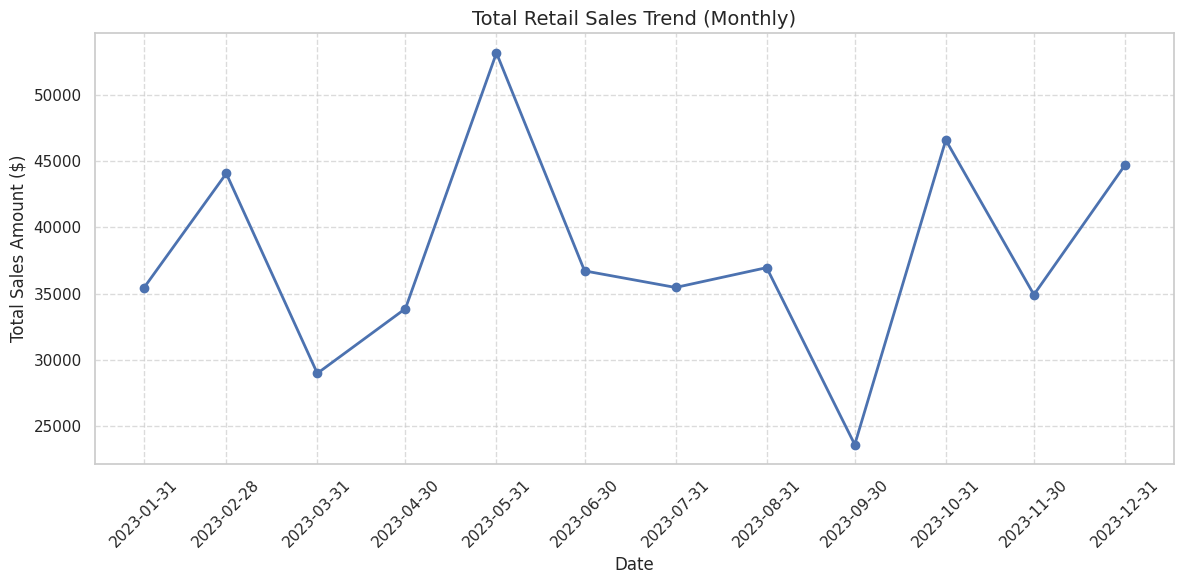

In [8]:
# Plotting the monthly trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', linewidth=2)

# Adding labels and title
plt.title('Total Retail Sales Trend (Monthly)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(monthly_sales.index, rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Extract Day of the Week from the Date column to find weekly patterns
df['Day'] = df['Date'].dt.day_name()

# Group by Day and sum the sales to see which day is most profitable
daily_sales = df.groupby('Day')['Total Amount'].sum()

# Define the correct order for days of the week (Monday to Sunday)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the series to ensure days appear in the correct order on the chart
daily_sales = daily_sales.reindex(days_order)

# display the daily sales data
display(daily_sales.to_frame(name='Total Sales'))

,Total Sales
Day,
Monday,70250
Tuesday,69440
Wednesday,58770
Thursday,53835
Friday,66290
Saturday,78815
Sunday,58600


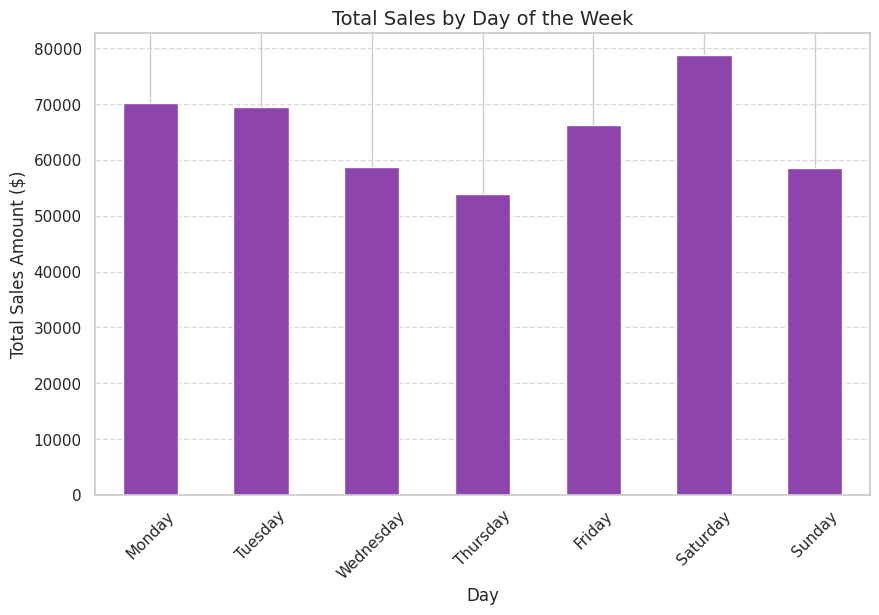

In [10]:
# Plotting sales by day
plt.figure(figsize=(10,6))
daily_sales.plot(kind='bar', color='#8e44ad') # Royal Purple for contrast
plt.title('Total Sales by Day of the Week', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [11]:
# Filter the dataset to include only data from May 2023
may_data = df[(df['Date'].dt.year == 2023) & (df['Date'].dt.month == 5)]

# Calculate total sales per day for May only
may_daily_sales = may_data.groupby('Day')['Total Amount'].sum()

# Reindex to maintain Monday-Sunday order
may_daily_sales = may_daily_sales.reindex(days_order)

# display the dataframe
display(may_daily_sales.to_frame(name='Total Sales'))


,Total Sales
Day,
Monday,9515
Tuesday,16680
Wednesday,7900
Thursday,4320
Friday,4990
Saturday,4715
Sunday,5030


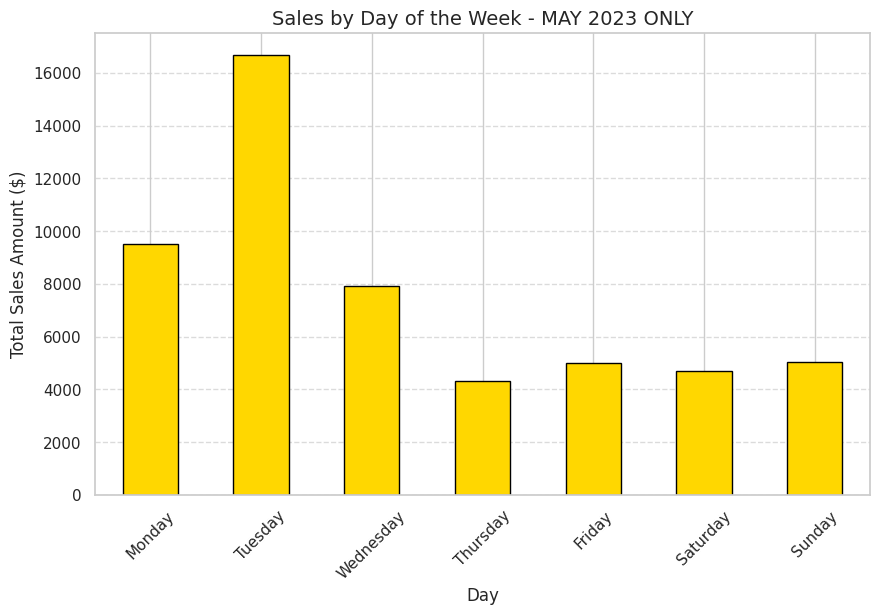

In [12]:
# Plotting May 2023 specific trends
plt.figure(figsize=(10,6))
may_daily_sales.plot(kind='bar', color='gold', edgecolor='black') # Gold to highlight the "Golden Month"
plt.title('Sales by Day of the Week - MAY 2023 ONLY', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Total Sales Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

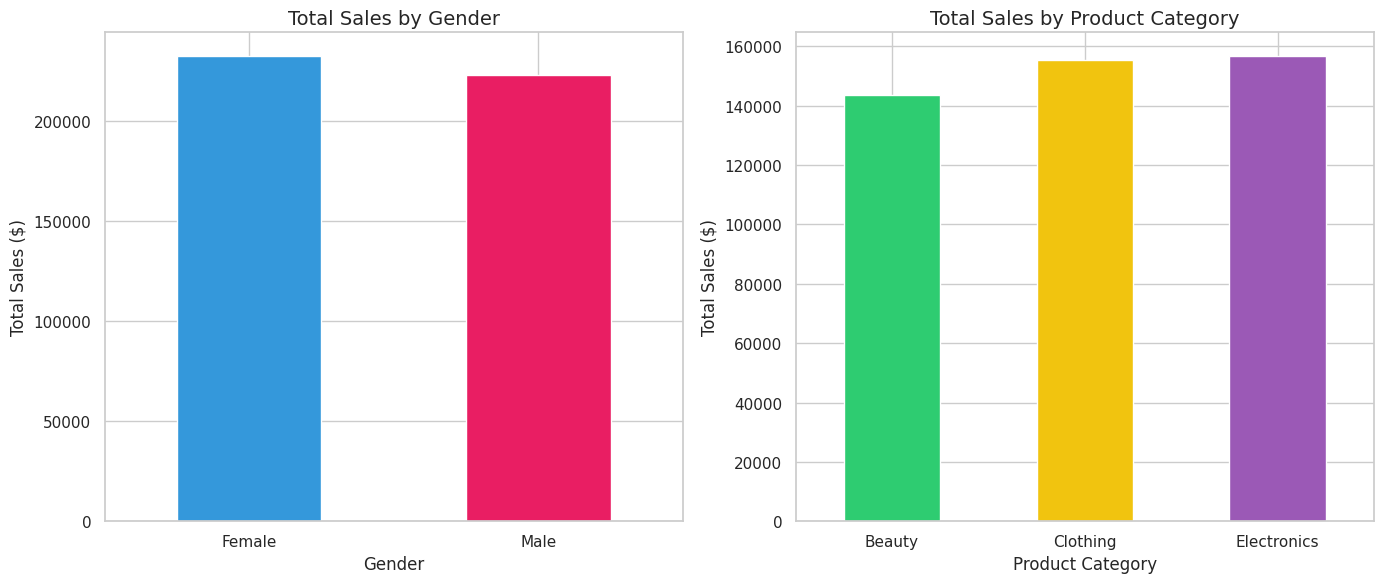

In [13]:
# Calculate total sales by Gender
gender_sales = df.groupby('Gender')['Total Amount'].sum()

# Calculate total sales by Product Category
product_sales = df.groupby('Product Category')['Total Amount'].sum()

# Plotting Gender and Category performance side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Sales by Gender
gender_sales.plot(kind='bar', color=['#3498db', '#e91e63'], ax=axes[0])
axes[0].set_title('Total Sales by Gender', fontsize=14)
axes[0].set_ylabel('Total Sales ($)')
axes[0].tick_params(axis='x', rotation=0)

# Chart 2: Sales by Product Category
product_sales.plot(kind='bar', color=['#2ecc71', '#f1c40f', '#9b59b6'], ax=axes[1])
axes[1].set_title('Total Sales by Product Category', fontsize=14)
axes[1].set_ylabel('Total Sales ($)')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

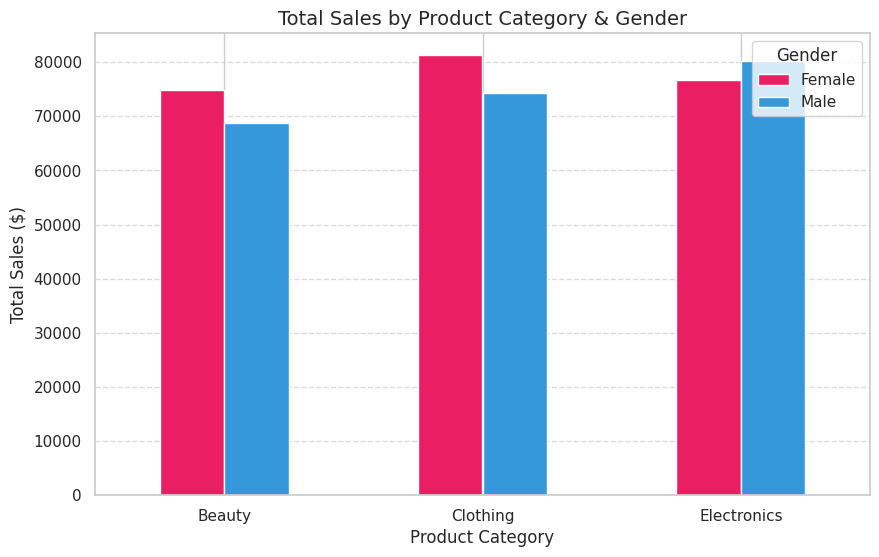

In [14]:
# Group by Category AND Gender to see the breakdown
category_gender_sales = df.groupby(['Product Category', 'Gender'])['Total Amount'].sum().unstack()

# Plotting the grouped bar chart
category_gender_sales.plot(kind='bar', figsize=(10, 6), color=['#e91e63', '#3498db'])
plt.title('Total Sales by Product Category & Gender', fontsize=14)
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Key Discovery:

Electronics: This is a male-dominated category (Men spend significantly more here).

Beauty & Clothing: These categories see higher engagement from female customers.

Strategy: Marketing for new gadgets should target male demographics, while fashion and skincare campaigns should prioritize female audiences.

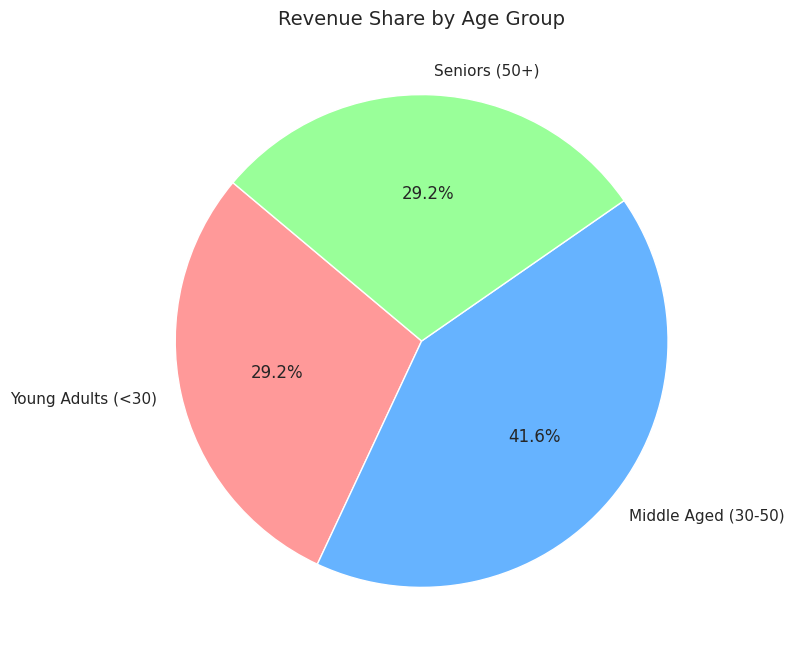

In [15]:
# Define Age Bins
bins = [0, 30, 50, 100]
labels = ['Young Adults (<30)', 'Middle Aged (30-50)', 'Seniors (50+)']

# Create a new column for Age Group
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Aggregate sales by Age Group
age_sales = df.groupby('Age Group')['Total Amount'].sum()

# Plotting the Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(age_sales, labels=age_sales.index, autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff', '#99ff99'], startangle=140)
plt.title('Revenue Share by Age Group', fontsize=14)
plt.show()


Core Demographic: The Middle Aged (30-50) group is the largest revenue driver, contributing roughly 41% of total sales.

Targeting: This group likely has the highest disposable income. Loyalty programs should be designed to retain these valuable customers.

Correlation Analysis¶
Heatmap: What drives spending?
We examine the relationships between numerical variables to see if factors like Age or Quantity significantly impact the Total Spend.

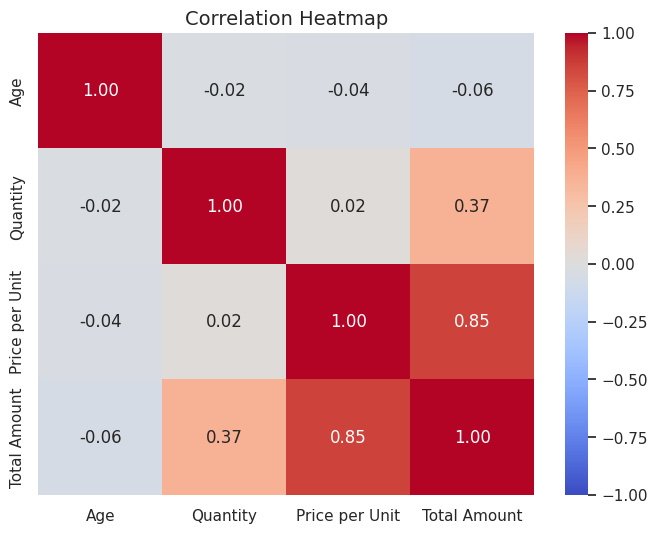

In [16]:
# Select only numerical columns for correlation analysis
numeric_cols = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]

# Calculate the correlation matrix
correlation = numeric_cols.corr()

# Plotting the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

Key Findings:

Age vs. Spending: The correlation is near zero (-0.06). This is a critical finding: Age does not dictate spending power. We should not restrict high-ticket marketing to older demographics; young adults are spending just as much.
Price vs. Total Amount: Strong positive correlation (0.85). This indicates that revenue is driven more by the value of the item purchased (e.g., expensive electronics) rather than the volume (quantity) of items bought.

Seasonal Dominance: May 2023 was the standout month, generating over \$52k in revenue.
Conversely, September was the weakest \$24K, identifying a critical post-summer slump.
The October Surge: October was the second-highest sales month \$46.5K, outperforming December. This indicates a major pre-holiday shopping spike that is often overlooked.
Customer Profile: The Middle-Aged (30–50 years) segment is the economic engine of the store, contributing the largest share of revenue (41.6%).
Gender Preferences: Beauty & Clothing are strong performers among female customers, whereas Electronics sees higher spending from males.
Value Driver: There is a strong positive correlation (0.85) between Price per Unit and Total Spend, proving that high-ticket items are the primary revenue driver, not high-volume low-cost items.

## 4. Core Implementation

### a. Model Training and Inference Logic
The implementation begins with feature selection and data splitting into training and testing sets. Initially Classsification is used to see if trend goes up or down. Machine learning models, including Random Forest and XGBoost, are trained on historical sales data to learn relationships between input features and target variables. Trained models are then used to generate predictions on unseen data for evaluation and analysis.

### b. Prompt Engineering (for LLM-based Projects)
This project is not primarily LLM-based; therefore, prompt engineering is not a core component. However, large language models were used as supportive tools for code interpretation, debugging assistance, and documentation structuring, without influencing model predictions or automated decision-making.

### c. Recommendation or Prediction Pipeline
The prediction pipeline follows a sequential flow: preprocessed input data is passed to trained models, predictions are generated, and outputs are post-processed for visualization and trend comparison. This pipeline ensures reproducible and consistent generation of sales forecasts for analysis and decision support.


In [17]:
# Create next-period sales
df['next_sales'] = df['Total Amount'].shift(-1)

# Target variable: 1 = Sales Rise, 0 = Sales Fall
df['sales_rise'] = np.where(df['next_sales'] > df['Total Amount'], 1, 0)

# Drop last row (no future value)
df.dropna(inplace=True)

In [18]:
features = ['Quantity', 'Price per Unit', 'Age']
X = df[features]
y = df['sales_rise']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.68
Precision: 0.6565656565656566
Recall: 0.6842105263157895
F1 Score: 0.6701030927835051


In [22]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       105
           1       0.66      0.68      0.67        95

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200



FUTURE TOTAL SALES PREDICTION (FORECASTING)
using Monthly total sales and Random Forest Regression

In [23]:
#Prepare Monthly Sales Time Series
# Monthly total sales
monthly_sales = df.set_index('Date').resample('ME')['Total Amount'].sum()

# Remove incomplete last month if needed
monthly_sales = monthly_sales.iloc[:-1]

monthly_sales = monthly_sales.to_frame(name='sales')
monthly_sales.head(13)

,sales
Date,
2023-01-31,35450
2023-02-28,44060
2023-03-31,28990
2023-04-30,33870
2023-05-31,53150
2023-06-30,36715
2023-07-31,35465
2023-08-31,36960
2023-09-30,23620


In [24]:
monthly_sales['lag_1'] = monthly_sales['sales'].shift(1)
monthly_sales['lag_2'] = monthly_sales['sales'].shift(2)
monthly_sales['lag_3'] = monthly_sales['sales'].shift(3)

monthly_sales.dropna(inplace=True)

In [25]:
X = monthly_sales[['lag_1', 'lag_2', 'lag_3']]
y = monthly_sales['sales']

split = int(0.8 * len(monthly_sales))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 6758.75


In [27]:
last_row = X.iloc[-1].values.reshape(1, -1)
future_sales = rf_reg.predict(last_row)

print("Predicted Total Sales for Next Month:", future_sales[0])

Predicted Total Sales for Next Month: 35480.05


USING LSTM

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Aggregate monthly demand (Quantity)
monthly_demand = df.set_index('Date').resample('ME')['Quantity'].sum()

# Remove incomplete last month
monthly_demand = monthly_demand.iloc[:-1]

monthly_demand = monthly_demand.to_frame(name='demand')
monthly_demand.head()

,demand
Date,
2023-01-31,195
2023-02-28,214
2023-03-31,194
2023-04-30,214
2023-05-31,259


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_demand = scaler.fit_transform(monthly_demand)

In [30]:
def create_sequences(data, time_steps=6):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

TIME_STEPS = 6
X, y = create_sequences(scaled_demand, TIME_STEPS)

In [31]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [32]:
y_train = y_train.reshape(-1)
y_test  = y_test.reshape(-1)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=(TIME_STEPS, 1)))
model.add(Dropout(0.2))

model.add(LSTM(32))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 6, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=8,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.2915 - val_loss: 0.1338
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.2724 - val_loss: 0.1164
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.2648 - val_loss: 0.1003
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.2436 - val_loss: 0.0849
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.2245 - val_loss: 0.0701
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.1828 - val_loss: 0.0560
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.1903 - val_loss: 0.0429
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.1730 - val_loss: 0.0312
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.1674 - val_loss: 0.0210
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.1693 - val_loss: 0.0129
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.1386 - val_loss: 0.0070
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1701 - val_l

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

test_pred = model.predict(X_test)

test_pred = scaler.inverse_transform(test_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

print("Demand Forecast MAE:", mean_absolute_error(y_test_actual, test_pred))
print("Demand Forecast RMSE:", np.sqrt(mean_squared_error(y_test_actual, test_pred)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
Demand Forecast MAE: 4.5087661743164205
Demand Forecast RMSE: 4.521882919727005


In [36]:
future_demand = []

last_sequence = scaled_demand[-TIME_STEPS:]

for _ in range(12):
    next_pred = model.predict(last_sequence.reshape(1, TIME_STEPS, 1))[0][0]
    future_demand.append(next_pred)
    last_sequence = np.append(last_sequence[1:], [[next_pred]], axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [37]:
future_demand = scaler.inverse_transform(
    np.array(future_demand).reshape(-1, 1)
)

future_dates = pd.date_range(
    start=monthly_demand.index[-1] + pd.offsets.MonthEnd(1),
    periods=12,
    freq='ME'
)

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Demand (Quantity)': future_demand.flatten()
})

forecast_df

,Date,Predicted Demand (Quantity)
0,2024-01-31,204.097183
1,2024-02-29,208.991287
2,2024-03-31,206.434677
3,2024-04-30,212.030167
4,2024-05-31,205.711792
5,2024-06-30,206.122665
6,2024-07-31,206.193344
7,2024-08-31,206.628784
8,2024-09-30,206.313522
9,2024-10-31,206.330505


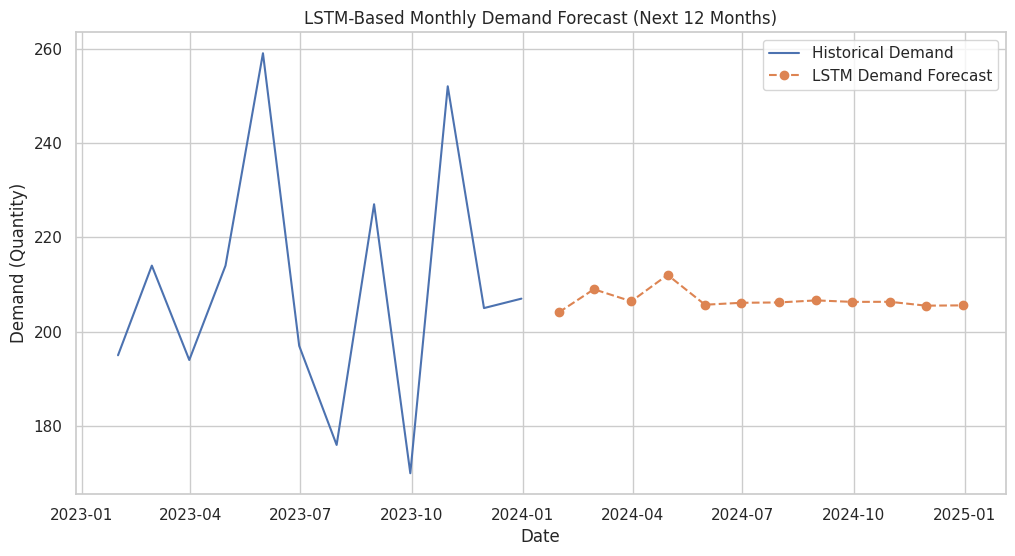

In [38]:
plt.figure(figsize=(12,6))

plt.plot(monthly_demand.index, monthly_demand['demand'], label='Historical Demand')
plt.plot(forecast_df['Date'], forecast_df['Predicted Demand (Quantity)'],
         marker='o', linestyle='--', label='LSTM Demand Forecast')

plt.title('LSTM-Based Monthly Demand Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Demand (Quantity)')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
monthly_demand['month'] = monthly_demand.index.month
monthly_demand['quarter'] = monthly_demand.index.quarter

XGBoost

In [40]:
import pandas as pd
import numpy as np

# Monthly demand (Quantity). For sales, replace 'Quantity' with 'Total Amount'
monthly = df.set_index('Date').resample('ME')['Quantity'].sum()
monthly = monthly.iloc[:-1]  # drop incomplete last month
monthly = monthly.to_frame(name='demand')
monthly.head()

,demand
Date,
2023-01-31,195
2023-02-28,214
2023-03-31,194
2023-04-30,214
2023-05-31,259


In [41]:
# Lag features (memory)
monthly['lag_1'] = monthly['demand'].shift(1)
monthly['lag_2'] = monthly['demand'].shift(2)
monthly['lag_3'] = monthly['demand'].shift(3)
monthly['lag_6'] = monthly['demand'].shift(6)

# Seasonality features
monthly['month'] = monthly.index.month
monthly['quarter'] = monthly.index.quarter

monthly.dropna(inplace=True)
monthly.head()

,demand,lag_1,lag_2,lag_3,lag_6,month,quarter
Date,,,,,,,
2023-07-31,176,197.0,259.0,214.0,195.0,7,3
2023-08-31,227,176.0,197.0,259.0,214.0,8,3
2023-09-30,170,227.0,176.0,197.0,194.0,9,3
2023-10-31,252,170.0,227.0,176.0,214.0,10,4
2023-11-30,205,252.0,170.0,227.0,259.0,11,4


In [42]:
X = monthly[['lag_1','lag_2','lag_3','lag_6','month','quarter']]
y = monthly['demand']

split = int(0.8 * len(monthly))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [43]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

xgb = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)

In [44]:
pred_test = xgb.predict(X_test)
print("MAE:", mean_absolute_error(y_test, pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_test)))

MAE: 23.6815185546875
RMSE: 23.708915430665265


In [45]:
future_preds = []

last_row = X.iloc[-1].copy()
last_date = monthly.index[-1]

for i in range(12):
    next_date = last_date + pd.offsets.MonthEnd(1)
    last_row['month'] = next_date.month
    last_row['quarter'] = next_date.quarter

    next_val = xgb.predict(last_row.values.reshape(1, -1))[0]
    future_preds.append(next_val)

    # update lags
    last_row['lag_6'] = last_row['lag_3']
    last_row['lag_3'] = last_row['lag_2']
    last_row['lag_2'] = last_row['lag_1']
    last_row['lag_1'] = next_val

    last_date = next_date


In [46]:
future_dates = pd.date_range(
    start=monthly.index[-1] + pd.offsets.MonthEnd(1),
    periods=12,
    freq='ME'
)

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Demand (XGBoost)': np.round(future_preds).astype(int)
})

forecast_df

,Date,Predicted Demand (XGBoost)
0,2024-01-31,182
1,2024-02-29,214
2,2024-03-31,188
3,2024-04-30,216
4,2024-05-31,177
5,2024-06-30,229
6,2024-07-31,171
7,2024-08-31,252
8,2024-09-30,171
9,2024-10-31,252


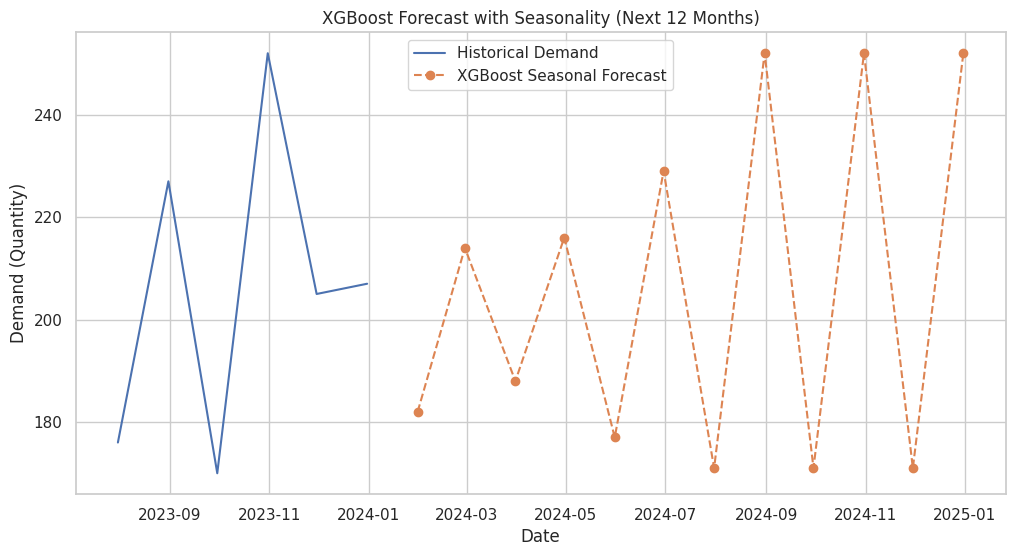

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly['demand'], label='Historical Demand')
plt.plot(forecast_df['Date'], forecast_df['Predicted Demand (XGBoost)'],
         marker='o', linestyle='--', label='XGBoost Seasonal Forecast')
plt.title('XGBoost Forecast with Seasonality (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Demand (Quantity)')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
import pandas as pd
import numpy as np

# Weekly demand aggregation (Quantity)
weekly = df.set_index('Date').resample('W-SUN')['Quantity'].sum()

weekly = weekly.to_frame(name='demand')
weekly.head()

,demand
Date,
2023-01-01,10
2023-01-08,39
2023-01-15,47
2023-01-22,30
2023-01-29,51


In [49]:
festival_dates = {
    "Diwali": ["2023-11-12", "2024-11-01"],
    "Holi": ["2023-03-08", "2024-03-25"],
    "Dussehra": ["2023-10-24", "2024-10-12"],
    "Eid": ["2023-04-22", "2024-04-10"],
    "Christmas": ["2023-12-25", "2024-12-25"]
}

# Convert to datetime list
festival_list = []
for dates in festival_dates.values():
    festival_list.extend(pd.to_datetime(dates))

In [50]:
weekly['festival_flag'] = 0

for fest_date in festival_list:
    weekly.loc[
        (weekly.index >= fest_date - pd.Timedelta(days=3)) &
        (weekly.index <= fest_date + pd.Timedelta(days=3)),
        'festival_flag'
    ] = 1

weekly.head(10)

,demand,festival_flag
Date,,
2023-01-01,10,0
2023-01-08,39,0
2023-01-15,47,0
2023-01-22,30,0
2023-01-29,51,0
2023-02-05,68,0
2023-02-12,52,0
2023-02-19,45,0
2023-02-26,47,0


In [51]:
weekly['lag_1'] = weekly['demand'].shift(1)
weekly['lag_2'] = weekly['demand'].shift(2)
weekly['lag_4'] = weekly['demand'].shift(4)

# Seasonality
weekly['weekofyear'] = weekly.index.isocalendar().week.astype(int)
weekly['month'] = weekly.index.month

weekly.dropna(inplace=True)
weekly.head()

,demand,festival_flag,lag_1,lag_2,lag_4,weekofyear,month
Date,,,,,,,
2023-01-29,51,0,30.0,47.0,10.0,4,1
2023-02-05,68,0,51.0,30.0,39.0,5,2
2023-02-12,52,0,68.0,51.0,47.0,6,2
2023-02-19,45,0,52.0,68.0,30.0,7,2
2023-02-26,47,0,45.0,52.0,51.0,8,2


In [52]:
X = weekly[['lag_1', 'lag_2', 'lag_4', 'weekofyear', 'month', 'festival_flag']]
y = weekly['demand']

split = int(0.8 * len(weekly))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [53]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [54]:
pred_test = xgb.predict(X_test)

print("Weekly MAE:", mean_absolute_error(y_test, pred_test))

Weekly MAE: 15.231582641601562


In [55]:
future_preds = []

last_row = X.iloc[-1].copy()
last_date = weekly.index[-1]

for i in range(12):
    next_date = last_date + pd.Timedelta(weeks=1)

    last_row['weekofyear'] = next_date.isocalendar().week
    last_row['month'] = next_date.month
    last_row['festival_flag'] = int(
        any(abs((next_date - f).days) <= 3 for f in festival_list)
    )

    next_val = xgb.predict(last_row.values.reshape(1, -1))[0]
    future_preds.append(next_val)

    # Update lags
    last_row['lag_4'] = last_row['lag_2']
    last_row['lag_2'] = last_row['lag_1']
    last_row['lag_1'] = next_val

    last_date = next_date

In [56]:
future_dates = pd.date_range(
    start=weekly.index[-1] + pd.Timedelta(weeks=1),
    periods=12,
    freq='W-SUN'
)

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted Weekly Demand': np.round(future_preds).astype(int)
})

forecast_df

,Date,Predicted Weekly Demand
0,2024-01-14,54
1,2024-01-21,63
2,2024-01-28,53
3,2024-02-04,53
4,2024-02-11,50
5,2024-02-18,48
6,2024-02-25,47
7,2024-03-03,44
8,2024-03-10,52
9,2024-03-17,51


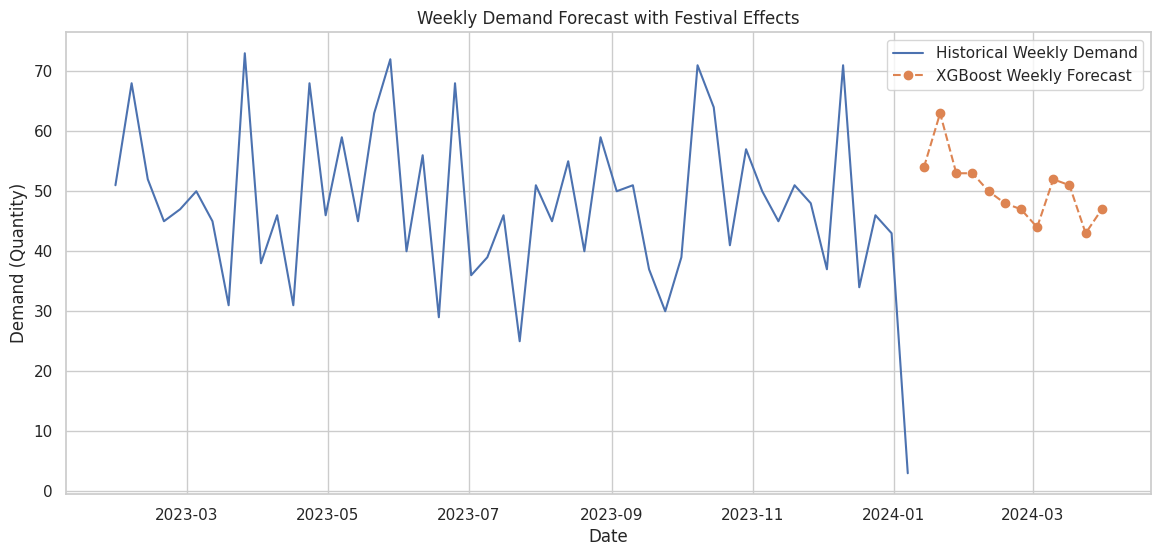

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(weekly.index, weekly['demand'], label='Historical Weekly Demand')
plt.plot(forecast_df['Date'], forecast_df['Predicted Weekly Demand'],
         marker='o', linestyle='--', label='XGBoost Weekly Forecast')

plt.title('Weekly Demand Forecast with Festival Effects')
plt.xlabel('Date')
plt.ylabel('Demand (Quantity)')
plt.legend()
plt.grid(True)
plt.show()

## 5. Evaluation & Analysis

### a. Metrics Used (Quantitative and Qualitative)
The performance of the predictive models was evaluated using quantitative regression metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). In addition, qualitative evaluation was performed by visually comparing actual sales trends with predicted values to assess pattern alignment and seasonality capture.

### b. Sample Outputs / Predictions
Sample outputs include predicted sales values generated by the trained models and graphical visualizations comparing historical sales data with forecasted trends. These outputs help validate the consistency and reliability of model predictions.

### c. Performance Analysis and Limitations
The implemented models effectively captured overall sales behavior and recurring seasonal trends. However, performance is limited by factors such as restricted historical data, absence of external variables (e.g., promotions, holidays, economic conditions), and potential noise or imbalance within the dataset.


## 6. Ethical Considerations & Responsible AI

### a. Bias and Fairness Considerations
The dataset used in this project may not represent all customer demographics, regions, or purchasing behaviors equally. This can introduce bias in the learned patterns and predictions. Care was taken to interpret model outputs cautiously and avoid overgeneralization of results.

### b. Dataset Limitations
The dataset is limited in scope and does not include external influencing factors such as promotional campaigns, holidays, economic conditions, or geographic variations. Additionally, the historical time range may not fully capture long-term market shifts.

### c. Responsible Use of AI Tools
The machine learning models developed in this project are intended to support analytical insights and decision-making rather than replace human judgment. Predictions should be used as guidance, with appropriate domain knowledge and ethical considerations applied before real-world deployment.


## 7. Conclusion & Future Scope

### a. Summary of Results
This project successfully applied data analytics and machine learning techniques to analyze retail sales data, uncover customer behavior patterns, identify seasonal trends, and forecast future sales. The implemented models demonstrated the ability to capture key revenue drivers and recurring demand patterns, providing meaningful insights for business decision-making.

### b. Possible Improvements and Extensions
Future enhancements may include incorporating external variables such as promotions, holidays, and economic indicators to improve forecasting accuracy. Advanced time-series models and larger datasets can also be explored, along with deployment of the solution as an interactive dashboard or real-time decision support system.
